# White Wines: Quality Prediction Model

## Part I: Supervised Machine Learning models with Decision Tree and Random Forest 

In [1]:
import pandas as pd

In [2]:
pwd

'/Users/pratik'

In [3]:
wine = pd.read_csv('whitewines.csv')

In [4]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.7,0.62,0.24,1.10,0.039,6.0,62.0,0.99340,3.41,0.32,10.400000,5
1,5.7,0.22,0.20,16.00,0.044,41.0,113.0,0.99862,3.22,0.46,8.900000,6
2,5.9,0.19,0.26,7.40,0.034,33.0,123.0,0.99500,3.49,0.42,10.100000,6
3,5.3,0.47,0.10,1.30,0.036,11.0,74.0,0.99082,3.48,0.54,11.200000,4
4,6.4,0.29,0.21,9.65,0.041,36.0,119.0,0.99334,2.99,0.34,10.933333,6


In [9]:
print(wine.columns)
wine.dtypes

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### An interface to matplotlib.axes.Axes.hist() method

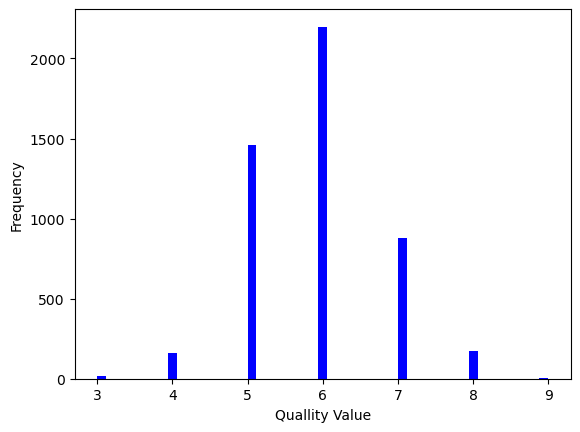

In [10]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=wine['quality'], bins='auto', color='b', ) 
plt.xlabel('Quallity Value')
plt.ylabel('Frequency')
plt.show()

### Decision Tree Model

#### Exploring and Preparing the Data

In [14]:
from sklearn.model_selection import train_test_split
target = wine['quality']
y = target
x = wine.drop(['quality'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=23458)

#### Design Decision Tree

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier() 
model = model.fit(x_train, y_train)

#### Export the decision tree to a tree.dot file for visualizing the plot easily anywhere

In [20]:
from sklearn.tree import export_graphviz
export_graphviz(model, out_file ='tree.dot', feature_names = x.columns)

#### To see Regression

In [21]:
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=x.columns, filled=True, rounded=True, 
                                special_characters=True)

In [24]:
from graphviz import Source
graph = Source(tree.export_graphviz(model, out_file = None, 
                                    feature_names=x.columns, filled=True, rounded=True, 
                                    special_characters=True))
graph

#### Evaluating model performance

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [26]:
y_predict = model.predict(x_test)
print(accuracy_score(y_test, y_predict)*100)

60.0


#### Finding Correlation Coeffecient

In [214]:
import numpy as np
np.corrcoef(y_test, y_predict)

array([[1.       , 0.5495943],
       [0.5495943, 1.       ]])

#### The results show a correlation of 54.95% with seed of 23458, however the correlation was 58% when checked for seed of 52.

#### Finding RMSE

In [28]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_predict, squared=False)
print(rmse)

0.8393389040896219


#### The results show that the rmse is 84%

#### Mean squared errors are the square of the errors between the actual values and the predictedvalues. The square root of this is the root mean square error. It lies between 0 and 1.The lower the rmse the better the model fit,In this case 0.84 shows that the errors between the acutal and predicted y target valuesare high, close to 84%, and indictaes that the model is not a good fit to the dataset.

### Random Forest Model

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() 
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(accuracy_score(y_test, y_predict)*100)

67.75510204081633


#### Using Random Forest increased the accurcy to 68% 

## Part II: Unsupervised Machine Learning Model with Clustering

In [30]:
import pandas as pd
input_file = ("/Users/pratik/Desktop/Harrisburg University programs/Courses/Late Fall Courses 2022/ANLY 530 Principles of Machine Learning/Assignments & PPT's/Assignment 3/Datasets/wine.csv")
data = pd.read_csv(input_file)
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [32]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Code to generate the elbow graph

#### Standardizing the data.

#### The data had to be standardized as the two columns Proline and Mg had much higher values compared to other variables. 

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop(columns=["Wine"]))
print(scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


#### Converting to Dataframe

In [34]:
list(data)

['Wine',
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline']

In [35]:
 data_new = pd.DataFrame( scaled, columns = (
 'Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline'))

In [36]:
data.shape

(178, 14)

In [37]:
data_new.shape

(178, 13)

In [38]:
data_new.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


#### Script for clustering using K-means algorithm and to generate the K-graph

At k=  2 The percentage of change in SSE is  99.99057116369853 %
At k=  3 The percentage of change in SSE is  22.95875395189381 %
At k=  4 The percentage of change in SSE is  7.646846481484896 %
At k=  5 The percentage of change in SSE is  6.480037478123993 %
At k=  6 The percentage of change in SSE is  5.787017739783259 %
At k=  7 The percentage of change in SSE is  4.843836107552621 %
At k=  8 The percentage of change in SSE is  4.7411496386262115 %
At k=  9 The percentage of change in SSE is  5.84987988272649 %
At k=  10 The percentage of change in SSE is  4.510150189781032 %
At k=  11 The percentage of change in SSE is  4.865493692600712 %
At k=  12 The percentage of change in SSE is  2.100798269757673 %
At k=  13 The percentage of change in SSE is  3.3786058520702094 %
At k=  14 The percentage of change in SSE is  3.823876621535803 %


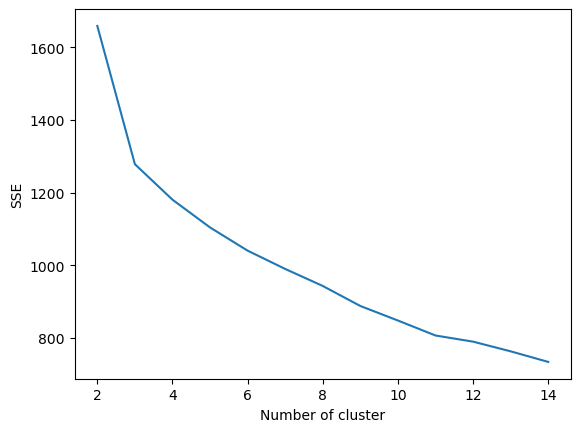

In [40]:
from sklearn.cluster import KMeans
sse = {}
last_sse = 17592402.70373319
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init = 25).fit(data_new)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    change_per = (last_sse-kmeans.inertia_)/last_sse*100
    print ('At k= ',k,'The percentage of change in SSE is ',change_per,'%') 
    last_sse = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values())) 
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#### Kmeans graph interpretation for best value of K

In [41]:
pd.Series(kmeans.labels_).value_counts()

0     22
6     21
2     19
10    18
7     16
8     16
12    14
1     12
4     11
13     8
5      8
9      6
3      4
11     3
dtype: int64

###### As we see from the graph above that the best value of k frpm elbow method looks like 3. The difference in percentage of cahnge of Sum ofSquared distances within cluster is 22.9%, the count of objects in cluster 3 is 20.

### Model with 3 Cluster centers (K=3)

In [42]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1234, n_init = 25 ).fit(data_new)
kmeans.cluster_centers_

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [43]:
pd.Series(kmeans.labels_).value_counts() ## table of counts for clusters

2    65
0    62
1    51
dtype: int64

#### Adding a new column for Cluster naumber and changing labels from 0,1,2 to 1,2,3.

In [44]:
data["Wine"].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [70]:
data_new["Cluster"] = kmeans.labels_
data_new.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


#### Changing labels using map function

In [71]:
current_labels = [2,0,1]
desired_labels = [2,1,3]
# create a dictionary for your corresponding values
map_dict = dict(zip(current_labels, desired_labels))
map_dict

# map the desired values back to the dataframe
# note this will replace the original values
data_new['Cluster'] = data_new['Cluster'].map(map_dict)
data_new

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Cluster
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,1
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,3
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,3
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,3


In [72]:
data_new["Cluster"].value_counts()

2    65
1    62
3    51
Name: Cluster, dtype: int64

### List of cluster center coordinates for each variable and each cluster

In [73]:
kmeans.cluster_centers_ 

array([[ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

#### Creating data frame with cluster cetners for 3 means (as we have K=3), with each column names (X-coordinate variable  names of centers) containing the wieghtage value of variable (X-coordinate values of respective variables) for each mean (3 means)

In [74]:
pd.DataFrame(kmeans.cluster_centers_, columns = ('Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Phenols',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Proanth',
 'Color.int',
 'Hue',
 'OD',
 'Proline'))

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088
2,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846


### K-means  Results interpretation for 3 clusters

#### As we see from the abpve results that center 0 is heavy on Proline variable and it dominates the Proline variable as well. Malic. Acid, N.Phenol and Color.int variables are dominated by Cluster 1

### Accuracy and Effieciency

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#### Comparison between actual and predicted wine type

In [76]:
confusion_matrix(data_new["Cluster"], data['Wine'])

array([[59,  3,  0],
       [ 0, 65,  0],
       [ 0,  3, 48]])

In [77]:
accuracy_score(data_new["Cluster"], data['Wine'])*100

96.62921348314607

#### The accuracy is 96.63% when using seed of 1234. However the initital accuracy obtained was 34.38%. This happened as the model had initially classified the label for largest cluster as 2, second largest as 0 and the last as 1 ( rank order of 0, 1, 2) . However the actual data had the highest counts for label 2, second largest as 1 and last as label 3 (rank order of 1, 2, 3) . So the largest cluster in model was kept at 2, second largest relabelled as label 1(from 0) and last relabelled as label 3(from1)( Note: ranking order changed from 0,1,2 to 1,2,3), to march the order of highest to lowest clusters in actual y variable, which was removed from dataset during analysis. However even if the order wasnt changed the model had classified the clusters, however the labels were 0,1,2 instead of 1,2,3 as in real data y variable, and the order of labelling clusters based on counts was different than the actual Y. That  was the reason the Accuracy was so low, but it didnt mean that the model had not classified clusters efficiently. Other than that, the model ahd some misclassifications even at 96%, and we will check the RMSE value further to see if the micalssifications will propogate further when used.



In [78]:
data_new["Cluster"].value_counts()

2    65
1    62
3    51
Name: Cluster, dtype: int64

In [79]:
data["Wine"].value_counts() 

2    71
1    59
3    48
Name: Wine, dtype: int64

#### Removing the Cluster column which was added before

In [80]:
data_new = data_new.drop(columns = ["Cluster"], axis = 1)

In [81]:
data_new.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [82]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Part III: Supervised Machine Learning Models using Standardized data

## Decision Tree

In [83]:
# Design Decision Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [84]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [85]:
target = data["Wine"]

In [86]:
target.value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

#### Randomizing the data

In [87]:
import random
random.seed(1234)
indx = random.sample(range(0, 178), 178) 
data_rand = data.iloc[indx] 
target_rand = target.iloc[indx]

#### Using data_rand for X only as data_rand is randomized and does not contain the y variable. Decision doesnt need to standardize the data as they are not sensitive to variance. Train, test data with a aplit of 80% data for training set and 20% data for testing set and a seed of 1234.

In [88]:
from sklearn.model_selection import train_test_split

target = data["Wine"]

y = target_rand
x = data_rand.drop(columns = ["Wine"], axis = 1)   ## dropping the target variable.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1234)

#### Checking Target count percentage in training and testing data

In [89]:
 y_train.value_counts() / y_train.shape

2    0.401408
1    0.323944
3    0.274648
Name: Wine, dtype: float64

In [90]:
y_test.value_counts() / y_test.shape

2    0.388889
1    0.361111
3    0.250000
Name: Wine, dtype: float64

### Decision Tree Model

In [96]:
model = tree.DecisionTreeClassifier() 
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[11  2  0]
 [ 0 14  0]
 [ 0  0  9]]


In [97]:
print(accuracy_score(y_test, y_predict)*100)

94.44444444444444


#### Using the Decision Tree we get an accuracy of 94.44%. This accuracy score was obtained from testing on just one dataset. Howevre, if we use K-folds Leave One out Cross Validation technique to validate the dataset, we can do some hyperparameter tuning if necessary. The average of the accuracies of the ten subsets may then be used which may be better and higher, and the tuned parameters if any cane be used for future data prediction.

### Random Forest Model

In [98]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier() 
model = model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(confusion_matrix(y_test, y_predict))

[[13  0  0]
 [ 0 14  0]
 [ 0  0  9]]


In [99]:
print(accuracy_score(y_test, y_predict)*100)

100.0


#### Finding RMSE

In [93]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_predict, squared=False)
rmse

0.23570226039551584

#### We get a rmse of 23.36% as above, which looks like a good value of root mean square error, and hence the model can give a good estimate of classifying the wine type. Based on the rmse value, it seems that there will be some amount of misclassifications further through the analysis, but it is very low and seems like more than acceptable.

### Conclusion:

#### It is observed that after Normalizing the data, the Decision Tree efficiency increased from 60% to 94% whereas the Random Forest efficiency increased from 67% to 100%. The RMSE decreased from 83% to 24%, which shows that the model performed much better after Normalizing and can be used to predict the Quality of White Wines. The RMSE value can be used as an performance measure to evaluate the efficiency of the model in addition to the Accuracy. Unsupervised models using Kmeans Clustering algorithm showed the best value of K as 3. Futhermore, the accuracy of clustering when using a k value of 3, measured against the actual Wine quality group counts was seen to be 96%. 